In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

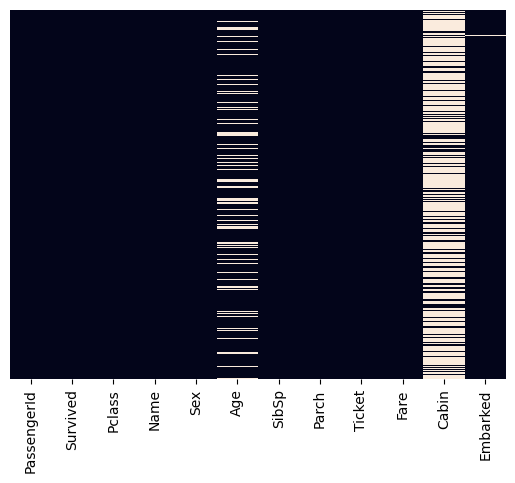

In [4]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\Darshan Mahajan\AppData\Local\Temp\ipykernel_22628\2364673470.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data= df,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

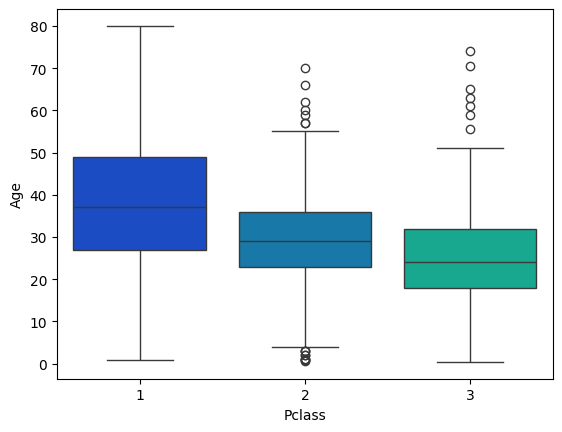

In [9]:
sns.boxplot(x='Pclass', y='Age', data= df, palette='winter')

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return  29
        elif Pclass == 3:
             return 24
    else:
        return Age 
        

In [20]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age,axis=1)

<Axes: >

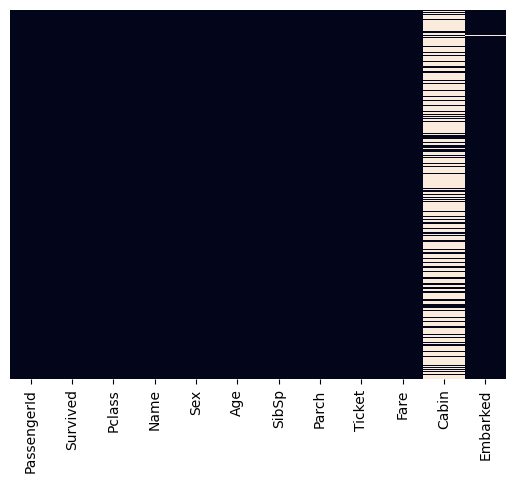

In [22]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [23]:
df.drop('Cabin', axis=1, inplace=True)


<Axes: >

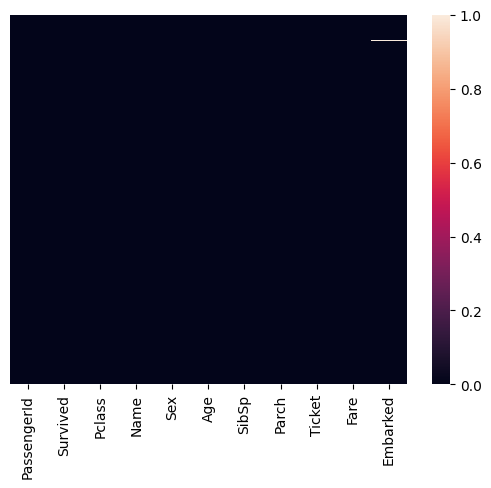

In [24]:
sns.heatmap(df.isnull(), yticklabels=False )

In [25]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

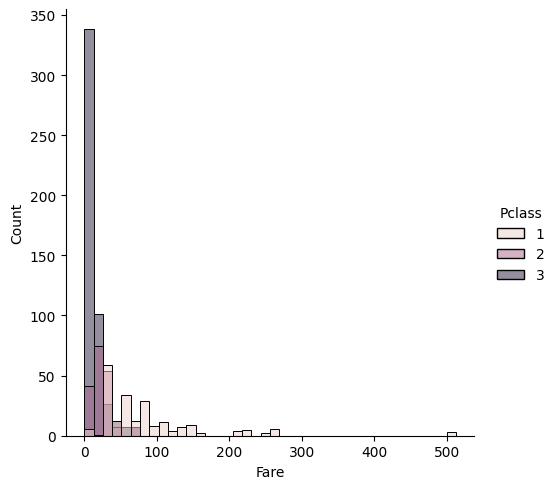

In [37]:
sns.displot(df.dropna(subset=['Fare']), x='Fare', kde=False, bins=40, hue='Pclass')

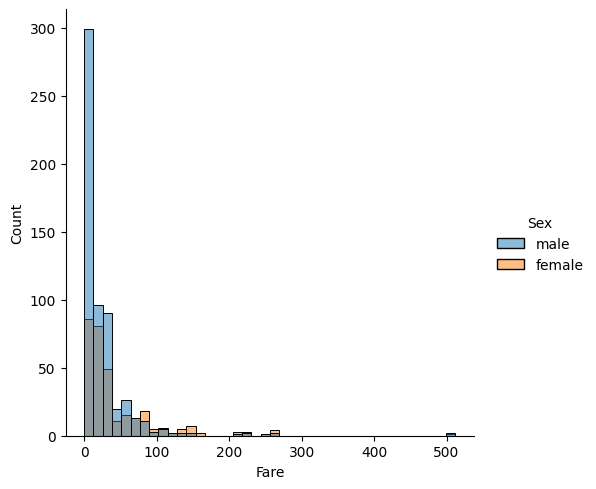

In [38]:
sns.displot(df.dropna(subset=['Fare']), x='Fare', kde=False, bins=40, hue='Sex')

<Axes: xlabel='Fare'>

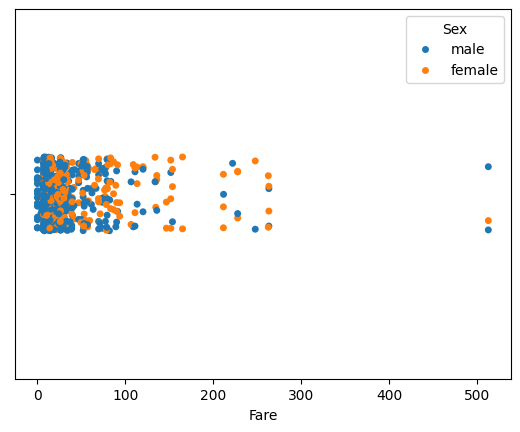

In [5]:
sns.stripplot(data=df, x='Fare', hue='Sex', jitter=True, size=5)


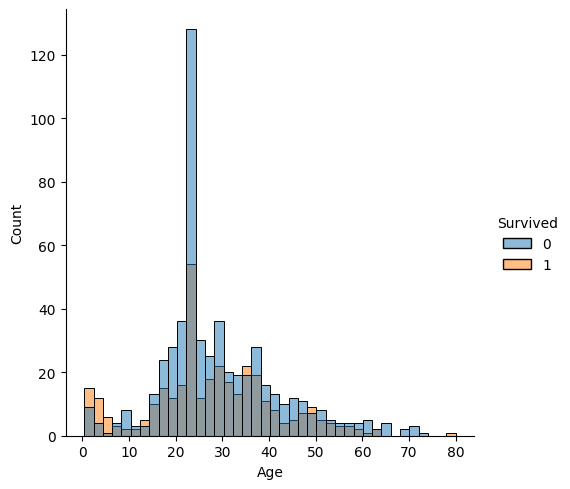

In [40]:
sns.displot(df.dropna(subset=['Age']), x='Age', kde=False, bins=40, hue='Survived')

## Analysis

1) About 300 of Pclass 3 people travelled with zero fare.
2) No one paid the fare between price 300 to 500
3) Only 3 people paid fare more than 500
4) Majority of males travelled with fare between 0 to 50